In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import json

import sys
# !{sys.executable} -m pip install tabulate

In [20]:
data = None
with open('data.json') as json_file:
    data = json.load(json_file)

In [21]:
# len(data['scores'])
NUM_SCORES = len(data['scores'])
opt = data['optimal']

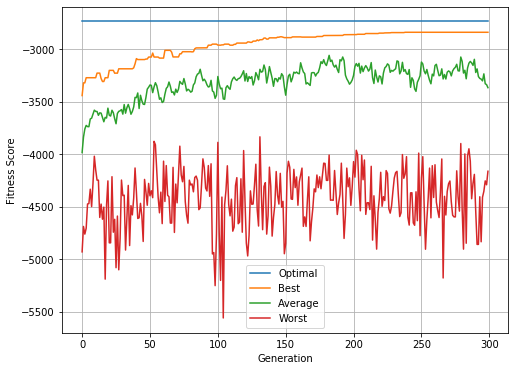

In [24]:
figure(num=None, figsize=(8, 6))

generations = [x for x in range(NUM_SCORES)]
data_preproc = pd.DataFrame({
    'Generation': generations,
    'Optimal': [- opt for _ in range(NUM_SCORES)],
    'Best': [x[0] for x in data['scores']],
    'Average': [x[1] for x in data['scores']],
    'Worst': [x[2] for x in data['scores']]})

ax = sns.lineplot(x='Generation', y='value', hue="variable",
             data=pd.melt(data_preproc[data_preproc.index % 1 == 0], ['Generation']))

ax.set(ylabel='Fitness Score')
# ax.legend().texts[0].set_text(None)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
ax.grid(True)

# plt.show()
plt.savefig('results.pdf')  


In [ ]:
a = np.array(data['best'])

np.set_printoptions(threshold=sys.maxsize)

a

In [ ]:
# table